In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
#Read that data into Python and call the dataframe churnData.
df = pd.read_csv(r"C:\Users\Juliane\Documents\GitHub\labs_repo\Labs\LabsW7\DATA_Customer-Churn.csv")


In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [33]:
df = df.fillna(df['TotalCharges'].mean())

In [34]:
df['Churn'] = df['Churn'].replace("Yes", 1).replace("No", 0)

In [35]:
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [36]:
#Check for null values in the dataframe. Replace the null values.   # MAYBE AGAIN WITH NEXT NEIGHBOUR
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]  # Define and put the features you want in X 
y = df['Churn']  # Target variable

# - Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [40]:
model = DecisionTreeRegressor(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

In [47]:
performance_model(y_train, y_test, y_pred_train, y_pred_test)

(                     Error_metric  Train  Test
 0                      Mean error   0.00  0.01
 1             Mean absolute error   0.29  0.30
 2              Mean squared error   0.15  0.16
 3         Root mean squared error   0.38  0.39
 4  Mean absolute percentual error    inf   inf
 5                              R2   0.24  0.21,
       Real_value  Predicted_value
 3993           0             0.10
 3148           0             0.15
 3531           0             0.19
 4403           0             0.10
 1859           1             0.15
 ...          ...              ...
 1293           0             0.15
 4023           0             0.01
 5200           0             0.15
 3775           1             0.38
 1945           0             0.01
 
 [4930 rows x 2 columns],
       Real_value  Predicted_value
 6625           1             0.59
 5975           1             0.59
 6891           0             0.19
 1681           0             0.01
 4780           0             0.59
 ... 

In [42]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,0.01
1,Mean absolute error,0.29,0.30
2,Mean squared error,0.15,0.16
3,Root mean squared error,0.38,0.39
4,Mean absolute percentual error,inf,inf
5,R2,0.24,0.21


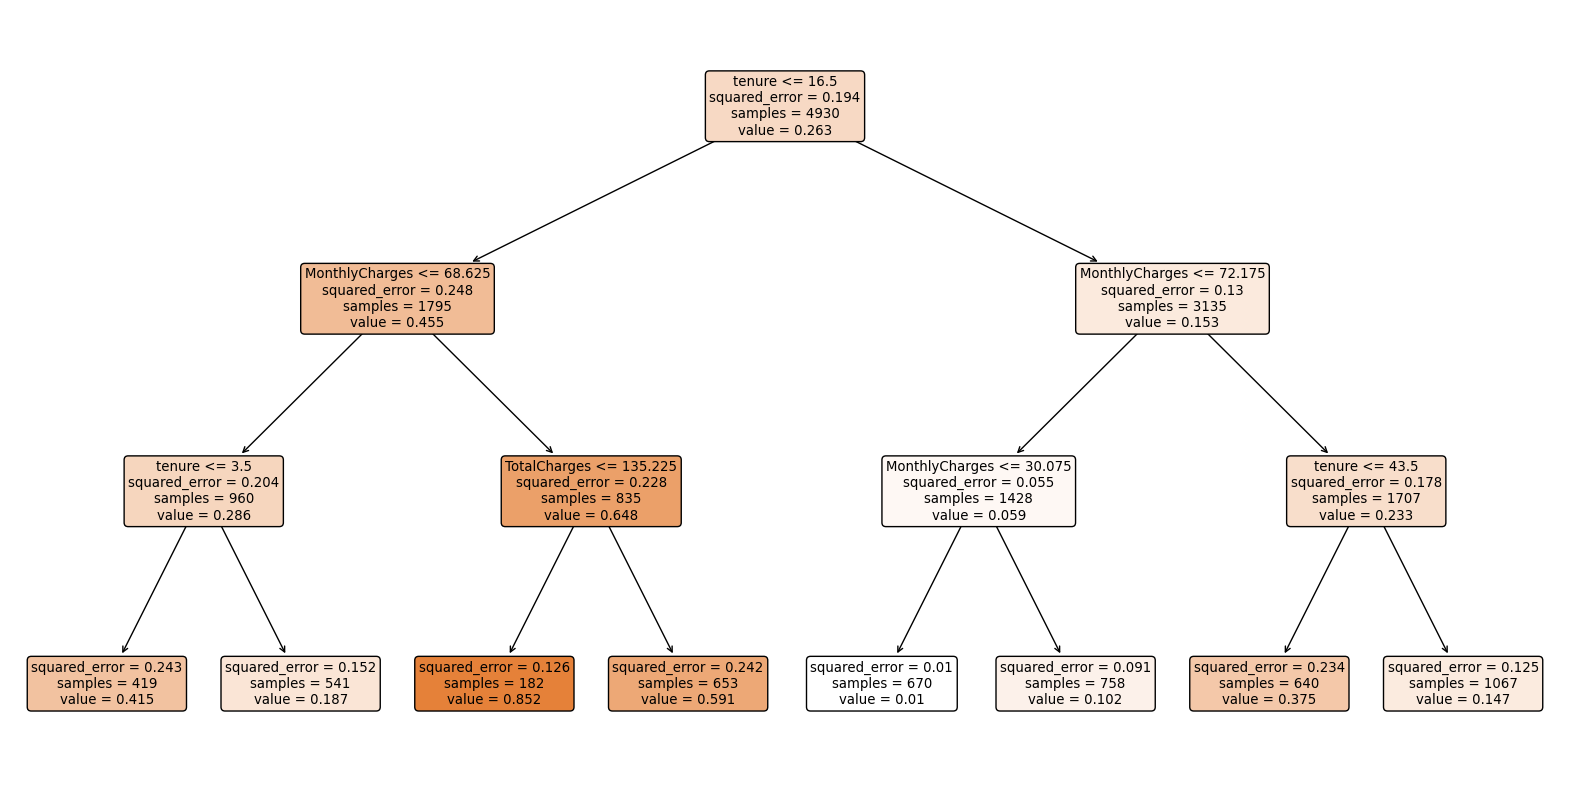

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

plot_tree(model, filled=True, rounded=True, feature_names=list(X.columns))
plt.show()


In [46]:
#Create a function that takes a list of integers as a parameter, iterates over the range as depths, 
#and prints the performance log of the decision tree for each depth
depth = range(10)
depth

range(0, 10)

In [50]:
      
def depth_performance_model(#put list):
    performance_df = pd.Dataframe()
    for d in list:
    
    model = DecisionTreeRegressor(max_depth=d)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    performance = pd.DataFrame({###put accuracy train etc 'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

   
    

In [ ]:
for i in depth:
    d = i

In [51]:
depth_performance_model(d)

                     Error_metric  Train  Test
0                      Mean error   0.00  0.00
1             Mean absolute error   0.21  0.28
2              Mean squared error   0.11  0.18
3         Root mean squared error   0.32  0.42
4  Mean absolute percentual error    inf   inf
5                              R2   0.46  0.11
